In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings('ignore')
import requests

In [12]:

df=pd.read_csv('SampleSuperstore.csv')

In [13]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
df.shape

(9994, 13)

In [15]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [16]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [19]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [23]:
df.duplicated().sum()

17

In [27]:
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

In [31]:

df['Postal Code'] = df['Postal Code'].astype('object')

In [32]:
corr=df.corr()

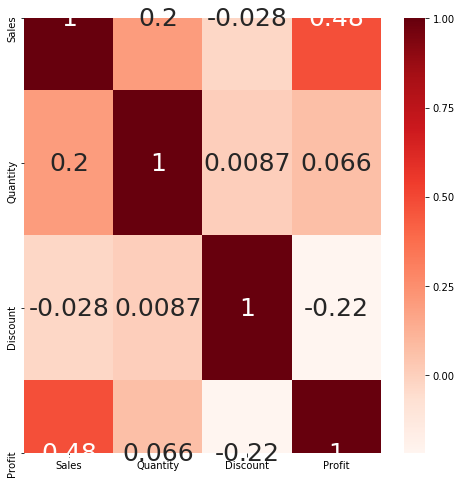

In [46]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap='Reds',annot_kws={'size': 25})

In [48]:
df=df.drop(['Postal Code'],axis=1)

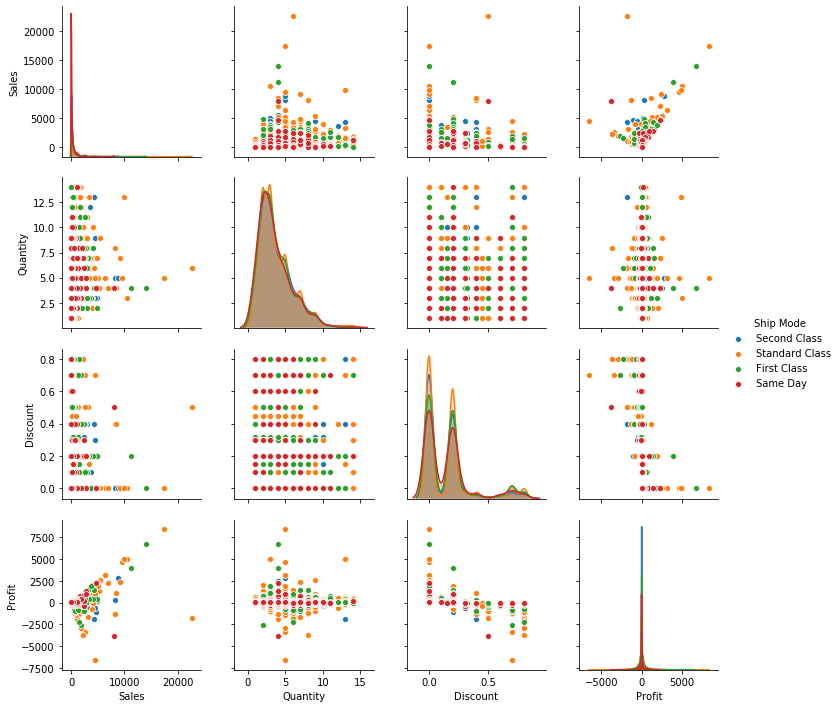

In [49]:
sns.pairplot(df,hue='Ship Mode')

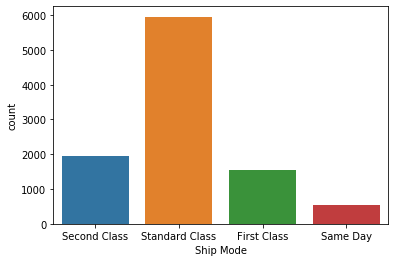

In [50]:
sns.countplot(x=df['Ship Mode'])

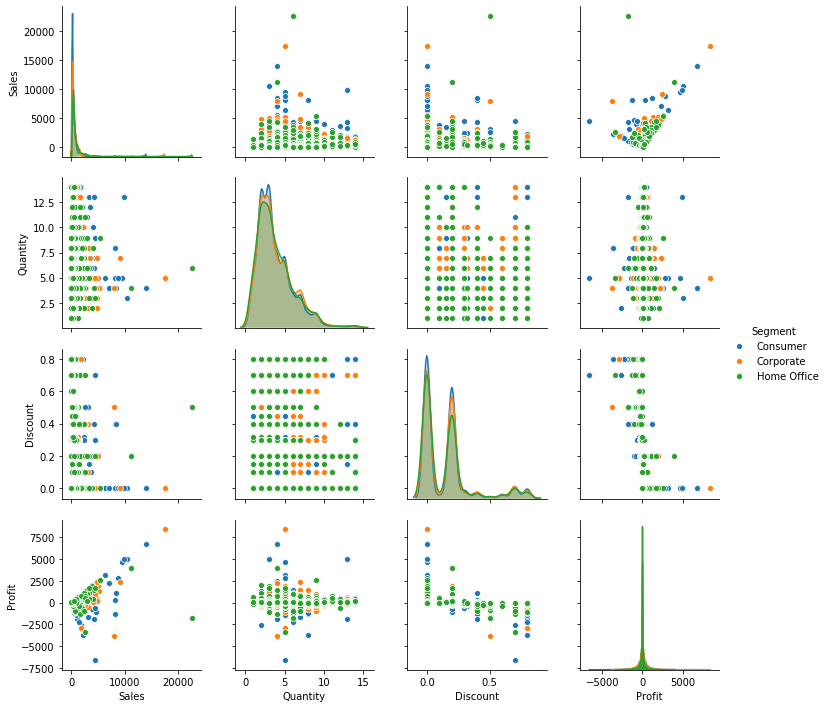

In [51]:
sns.pairplot(df,hue='Segment')

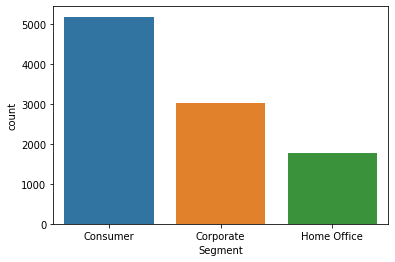

In [53]:
sns.countplot(x='Segment',data=df)

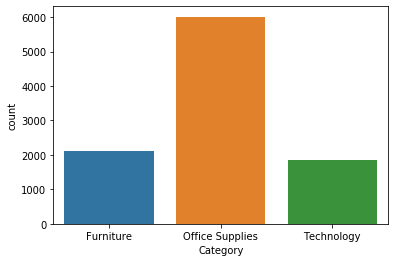

In [54]:
sns.countplot(x='Category',data=df)

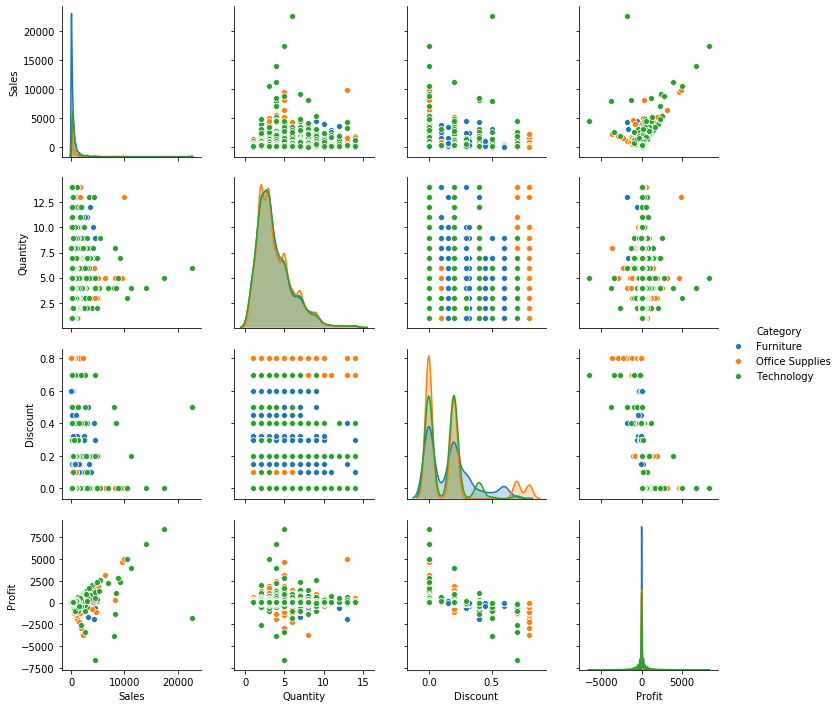

In [55]:
sns.pairplot(df,hue='Category')

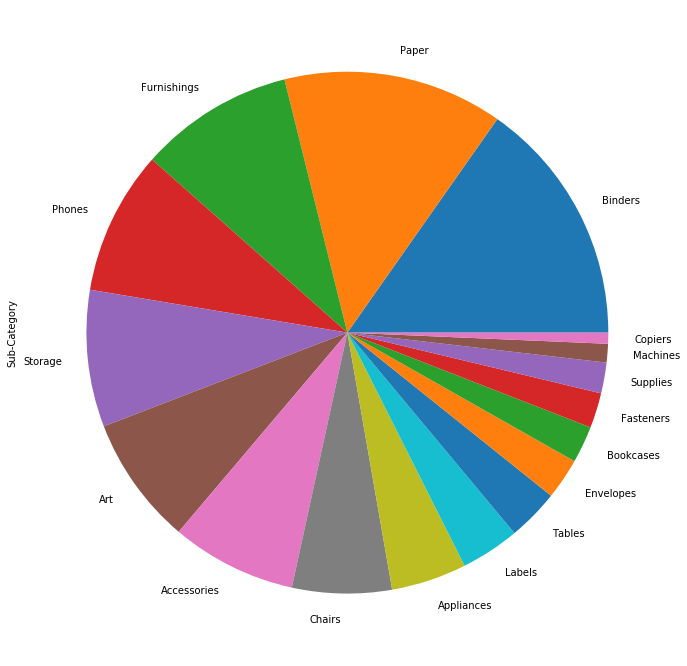

In [58]:
plt.figure(figsize=(15,12))
df['Sub-Category'].value_counts().plot.pie()

In [60]:
###observation 1: Paper,Furnishing,Binders,Phones,Storage,Art,Accessories,Chair contitutes maximum

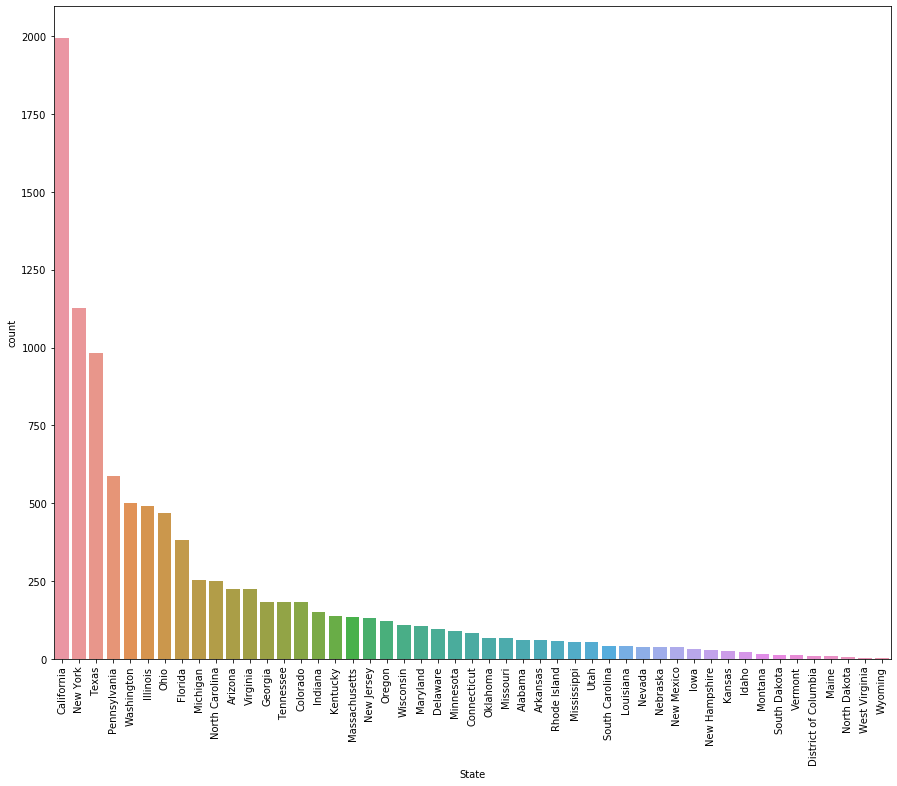

In [71]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [72]:
###Observation2:Maximum buyers are form california

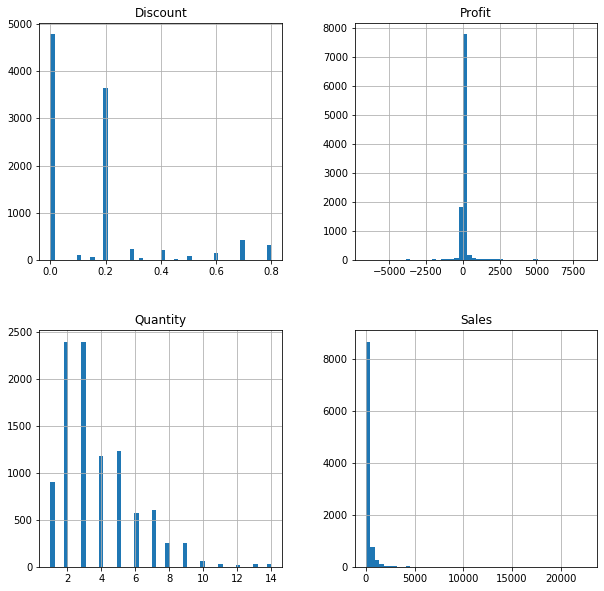

In [75]:
df.hist(figsize=(10,10),bins=50)
plt.show()

In [76]:
#observation 3: Maximum discount is between 0 and 20% and most customers buy quantity of 2 and 3


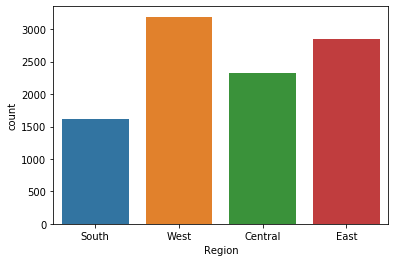

In [80]:
sns.countplot(x='Region',data=df)

In [81]:
###Observation4: South Region have least buyers

Text(0, 0.5, 'Discount')

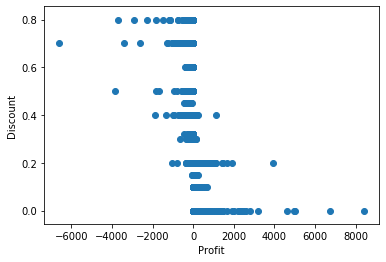

In [84]:
plt.scatter(df['Profit'],df['Discount'])
plt.xlabel('Profit')
plt.ylabel('Discount')

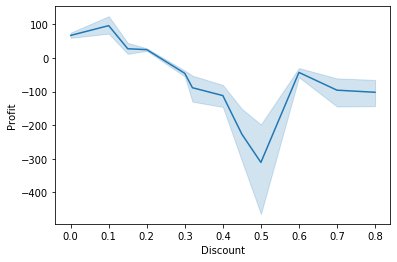

In [86]:
sns.lineplot(x='Discount',y='Profit',data=df)

In [87]:
###observation5:Profit and discount are not related

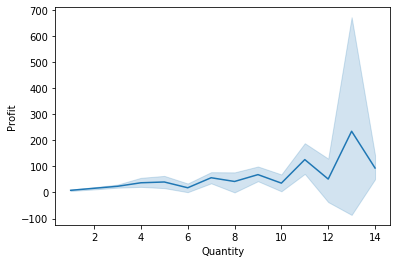

In [88]:
sns.lineplot(x='Quantity',y='Profit',data=df)

In [89]:
###observation6:Profit and quantity are directly related

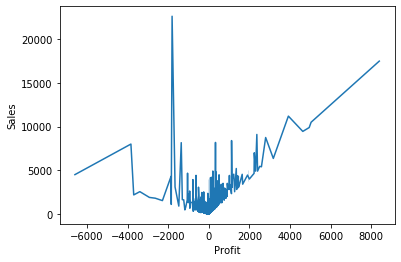

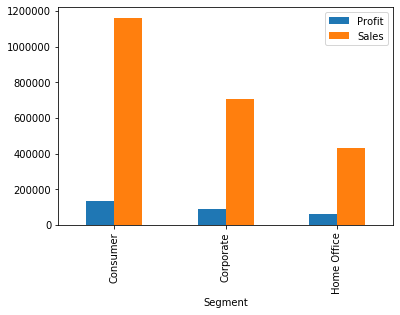

In [91]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar()

In [92]:
###Observation6:Profit and sales are amximum in consumer segment and minimum in home office segment

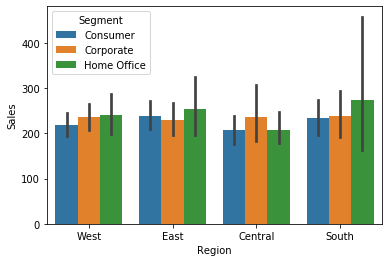

In [93]:
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index)

In [94]:
###observation7:Almost same sales from every region

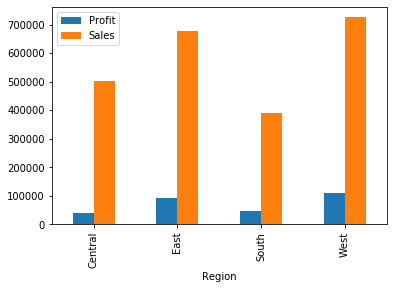

In [95]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar()

In [96]:
###observation8: maximum sales and profit in west region and minimum in south

<Figure size 1440x1440 with 0 Axes>

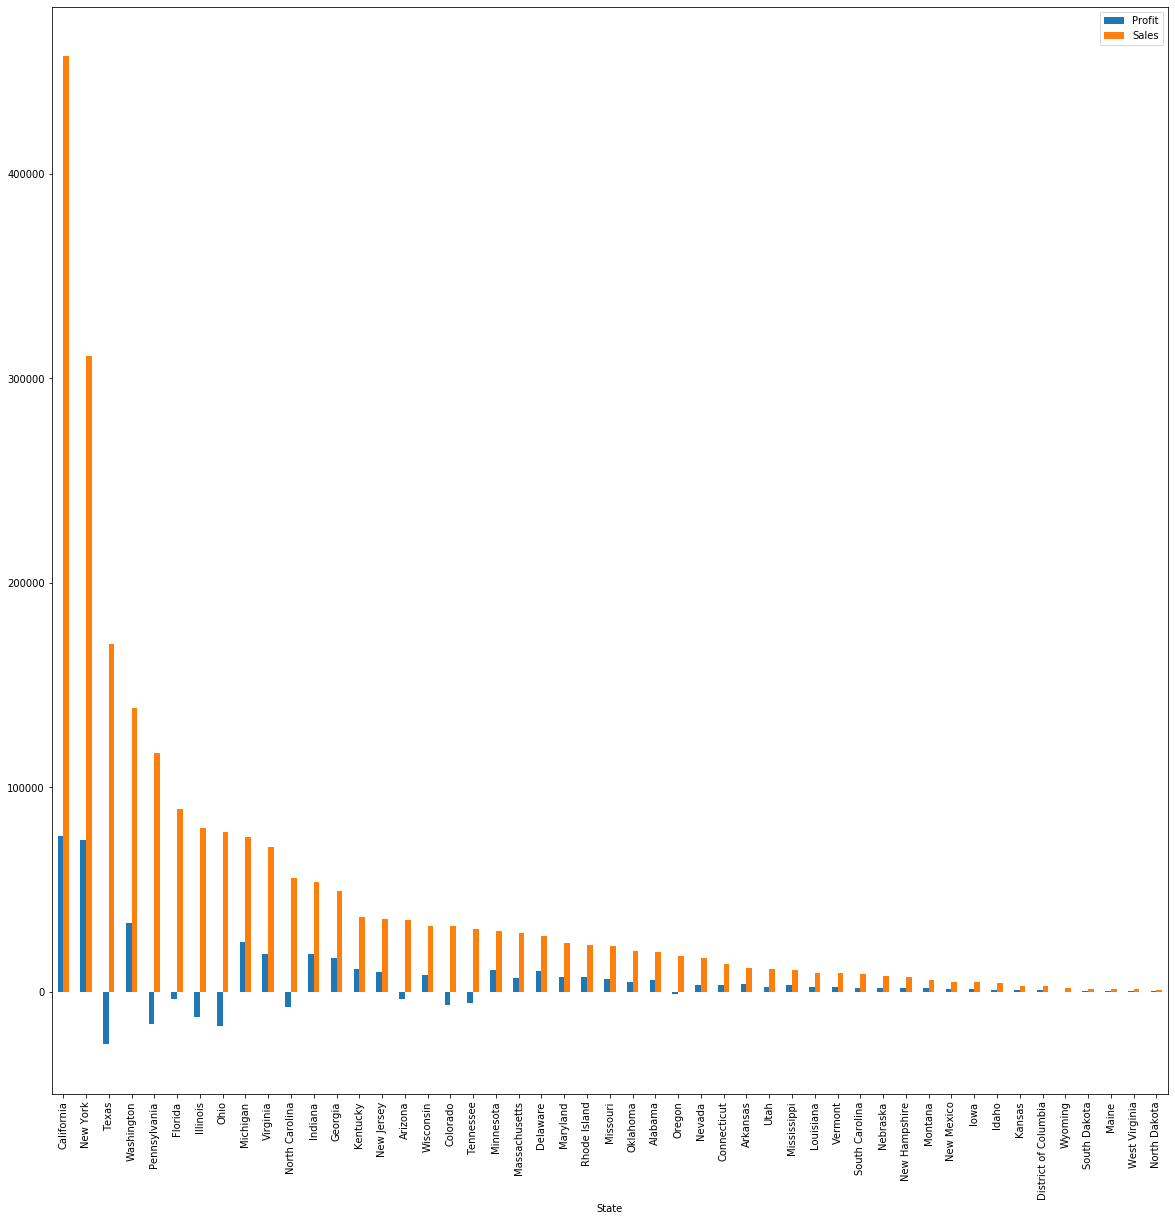

In [100]:
plt.figure(figsize=(20,20))
df.groupby('State')[['Profit','Sales']].sum().sort_values(by='Sales',ascending=False).plot.bar(figsize=(20,20))

In [101]:
###observation 9 : high profit in california and neyyork and loss in texas pennsylvania and ohio

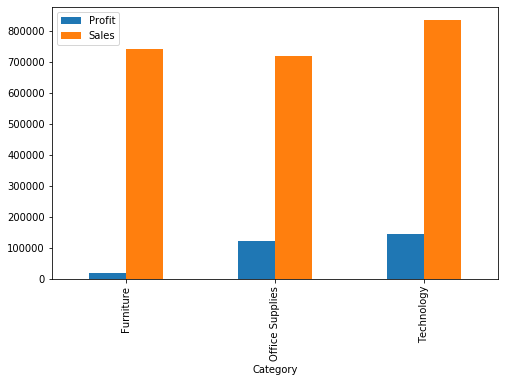

In [102]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(figsize=(8,5))

In [103]:
###Observation10:tech and office supplies have max sales and profit
### CAN work in office supplies and technology to make more porfit

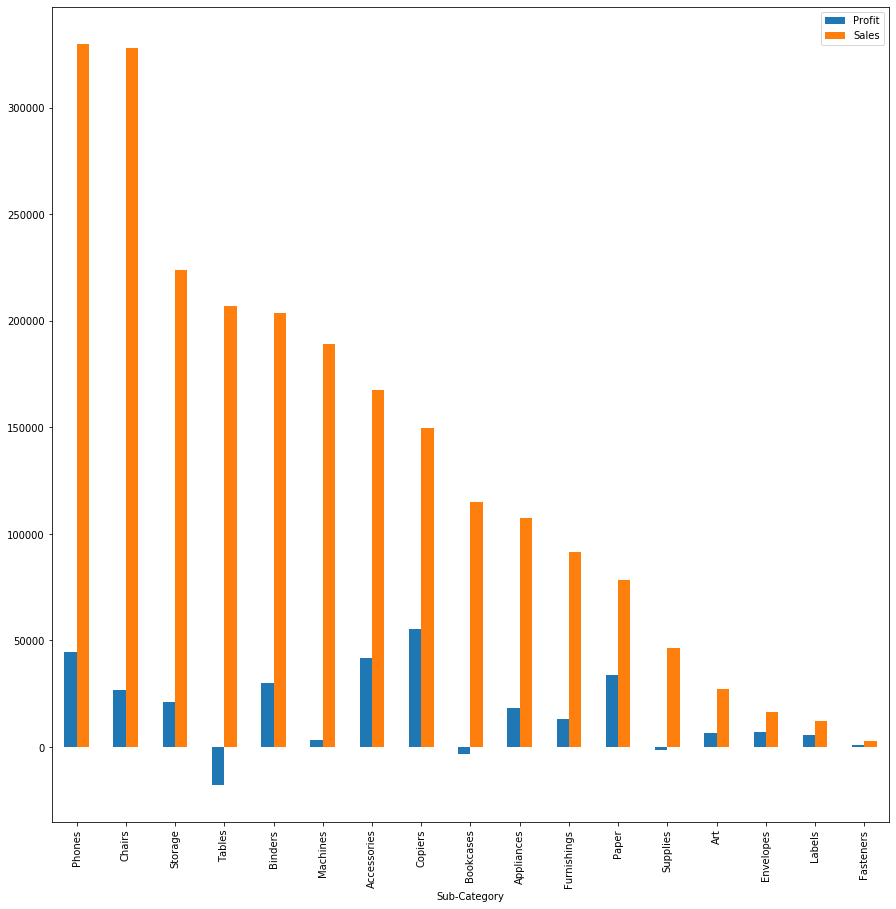

In [104]:
df.groupby('Sub-Category')[['Profit','Sales']].sum().sort_values(by='Sales',ascending=False).plot.bar(figsize=(15,15))

In [105]:
#obsrrvation11:phones have high sales followed by chairs
### tables and bookcases sub categories are in loss